# Gráficos con pyplot

Disclaimer: para mostrar el potencial de matplotlib vamos a utilizar herramientas y métodos que luego veremos mas en detalle durante otros modulos de la diplomatura (ej regresion, procesos gaussianos, funciones de scipy). Aqui solo se usan para explicar y justificar el uso de distintos tipos de graficos.

Comencemos con lo mas sencillo, usando `plt.plot` para graficar curvas o funciones 1d

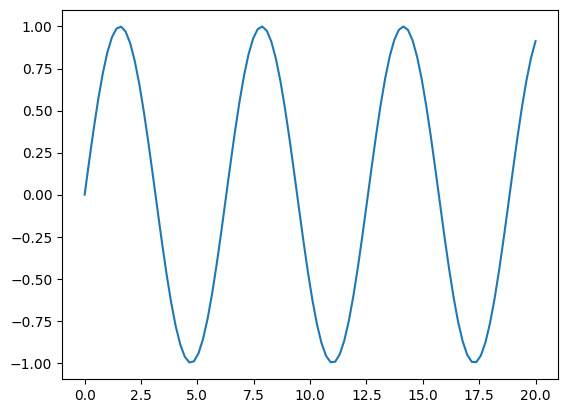

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 100)  
y = np.sin(x)
plt.plot(x, y);

## Multiples curvas en una misma figura

Solo tenemos que agregar `np.plot` por cada curva y van a graficarse inteligentemente (o no tanto) con los mismos ejes.

Toma el mayor de cada uno.

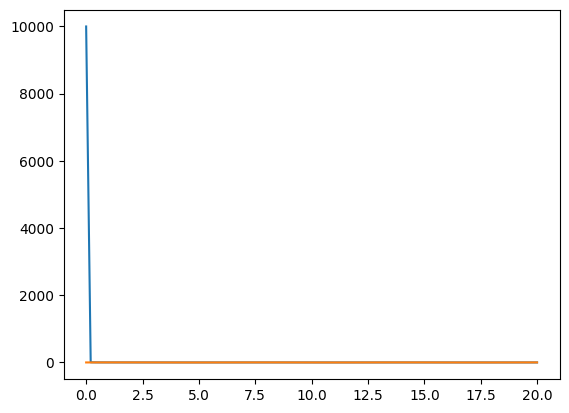

In [2]:
x = np.linspace(0.0001, 20, 100)  
y = 1/x
y2 = np.sin(x)
plt.plot(x, y);
plt.plot(x,y2);

## Límite de los ejes

En el caso anterior el plot acomoda los ejes a los máximos. 

Esto hace que perdamos perspectiva.

Definamos nosotros los límites de los ejes con:

`plt.axis([xmin, xmax, ymin, ymax])`

`plt.xlim(xmin,xmax)`

`plt.ylim(ymin,xmax)`

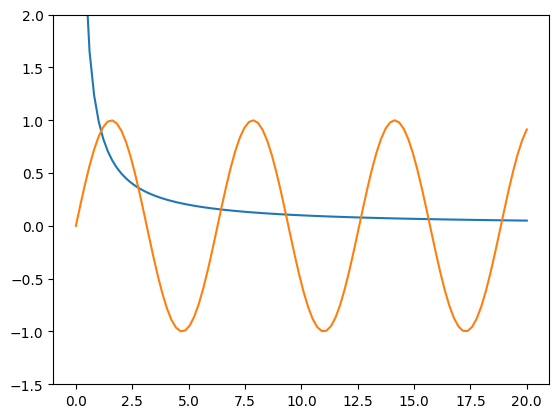

In [3]:
plt.plot(x,y);
plt.plot(x,y2);
plt.ylim(-1.5,2);

## Textos en el gráfico

Puedo agregar título y textos en los ejes para definirlos

` xlabel('Eje x'), ylabel('Eje y'), title('Titulo')`

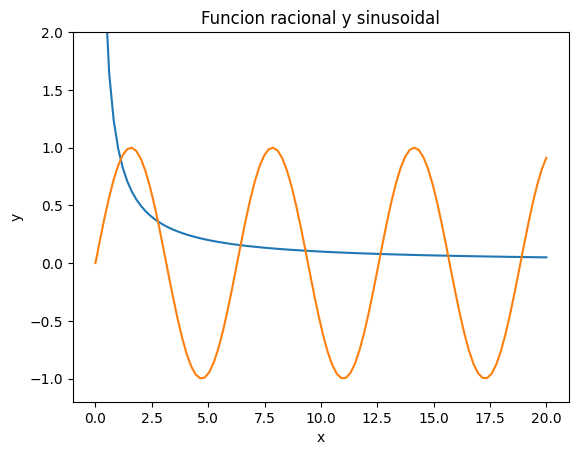

In [4]:
plt.plot(x,y)
plt.plot(x,y2)
plt.ylim(-1.2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funcion racional y sinusoidal');

## Definiendo el tamaño de la figura

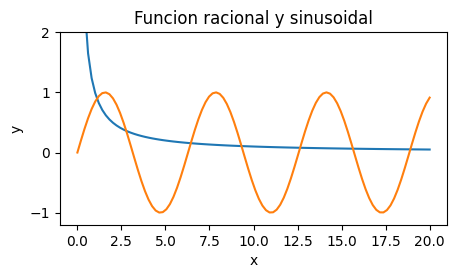

In [5]:
fig=plt.figure(figsize=(5,2.5))
plt.plot(x,y)
plt.plot(x,y2)
plt.ylim(-1.2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funcion racional y sinusoidal');

Por default el tama~no lo toma en pulgadas. 

+ Notar que estamos cambiando el aspect ratio
+ El tamaño de las fuentes cambia con la definicion del tamaño.

En general uno espera que las fuentes de las figuras sean de un tamaño similar (o *levemente* mas chico) a las del texto, con el `figsize` obtengo este efecto.

## Multiples curvas a partir de un arreglo

Si tengo un array de shape `[n,m]` me va a graficar m curvas.

(3, 100)


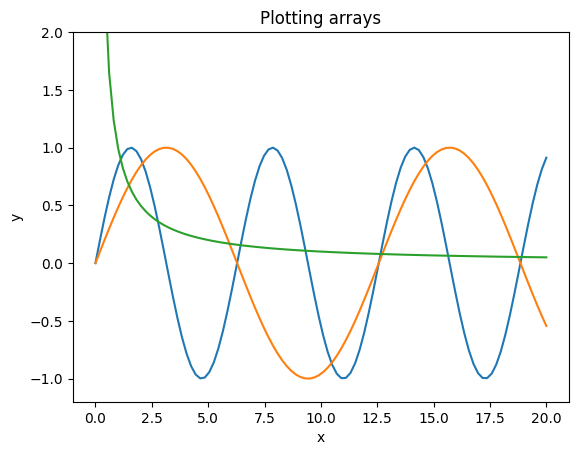

In [6]:
x = np.linspace(0.0001, 20, 100)
y=np.array([np.sin(x),np.sin(x/2),1/x])
print(y.shape)
plt.plot(x,y.T) # grafico las tres curvas a la vez.
plt.ylim(-1.2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plotting arrays');


## Colores y tipos de líneas

+ Puedo definir en forma explicita el color
`color='red'`  o en forma resumida `color='r'`. Ej `plt.plot(x,y,color='r')`
  
+ Puedo definir el tipo de linea con `linestyle='dashdot'` o con `linestyle='-.'`
+ Puedo combinar a ambos  Ej `plt.plot(x,y,'-.r')`
+ Puedo graficar puntos solo en donde estan los datos (sin lineas). Ej. `plt.plot(x,y,'o')`

### Para definir colores hay varios protocolos

1. Color resumido: rgbcmyk  `color='k'`
2. Escala de grises: [0,1] `color='0.5'`
3. Código Hexadecimal RGB: `#RRGGBB`, 00 to FF  `color='#FFDD44'`
4. Tupla RGB: `color=(1.0,0.2,0.3)`
5. Colores del default C0-C9 `color='C0'`

### Tipos de líneas

Las opciones existentes son: 

-  'solid', 'dashed', 'dashdot', 'dotted'
-  '-',     '--',     '.-',      ':'

### Gráfico puntos sin interpolar

Algunas opciones posibles: 'o' '.' 'x' '+' 's' '*'

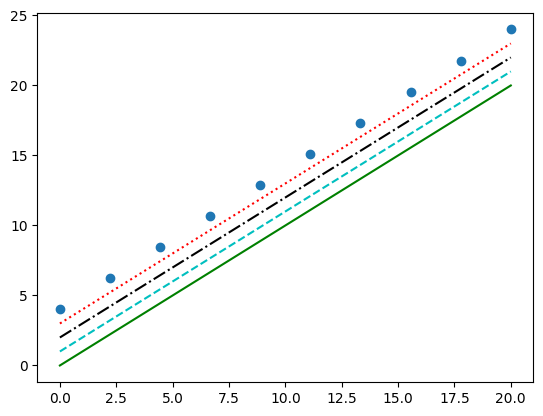

In [7]:
# Graficando curvas con colores y estilos explicitos
xlow=np.linspace(0.0001, 20, 10)
plt.plot(x, x, '-g')
plt.plot(x, x + 1, '--c') 
plt.plot(x, x + 2, linestyle='-.',color='k')
plt.plot(x, x + 3, ':r')
plt.plot(xlow, xlow + 4, 'o');

## Regresión

Supongamos que tenemos datos de la velocidad de caida de un objeto t,v y queremos obtener la curva que ajusta a estos datos a traves de regresion lineal. Vamos a usar  `np.polyfit` de numpy. 
La salida corresponde a los coeficientes del polinomio ajustado del grado mas alto al de menor.

Estimacion de la gravedad:  9.190762293834714


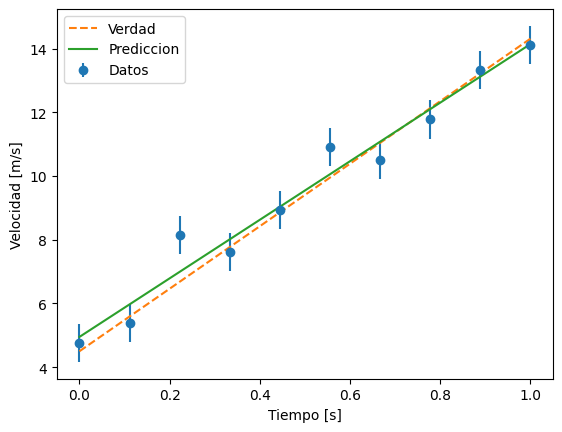

In [8]:
np.random.seed(5)
N=10  # nro de puntos
t=np.linspace(0,1,N)
vtrue=4.5+9.81*t
err=0.6
v=vtrue + err*np.random.normal(0,1,N) # mediciones/datos sinteticos
# uso regresion lineal para calcular la curva
greg,v0reg=np.polyfit(t, v, 1)
print('Estimacion de la gravedad: ',greg)
vpred = v0reg + greg * t
# grafico
plt.errorbar(t,v,yerr=err,fmt='o',label='Datos') # datos observacionales los ponemos con puntos
plt.plot(t,vtrue,'--',label='Verdad')
plt.plot(t,vpred,label='Prediccion')
plt.ylabel('Velocidad [m/s]')
plt.xlabel('Tiempo [s]')
plt.legend();

**Barras de error:** Para representar las observaciones con sus respectivos errores estamos usando: 
`plt.errorbar` `yerr` es el error en y, podríamos tambien colocar `xerr` si fuera el caso, `fmt` es el tipo de punto que queremos.

**Leyenda:** En cada una de las curvas que se plotea se agrega un argumento `label` que describe a la curva. Al final después de plotearlas se agrega `plt.legend()`
El matplotlib se encarga de recolectar todos los labels que pusimos y ponerlos.
Si no elegimos el lugar donde va la leyenda lo tratara de poner por default en el mejor lugar. De lo contrario podemos seleccionar donde lo queremos.



### <span style="color:blue"><b>Ejercicio</b></span> 
Como cambia la estimacion y la curva de prediccion si:
- si aumenta la cantidad de datos de 10 a 50 puntos.
- Tambien analice el caso de 10 datos pero con desviaciones estandards de 0.2, 0.6, 1.0
- como representa y que impacto tiene si el reloj para medir el tiempo tiene un error de 0.1 segundos.


## Graficando varias curvas con el mismo color

Como los colores por default se van ciclando no es posible repetir el color a menos que lo hagamos por la fuerza.

  Supongamos que queremos dos curvas con el mismo color (E.g. target y la inferida por un modelo).

+ En este caso tengo que especificar el color explicitamente. 

+ Los colores seleccionados por default en el matplotlib se pueden acceder con "C*N*" donde *N* es el nro de color entre 0 y 9.

+ Los colores por default son 10 y luego se vuelven a repetir.


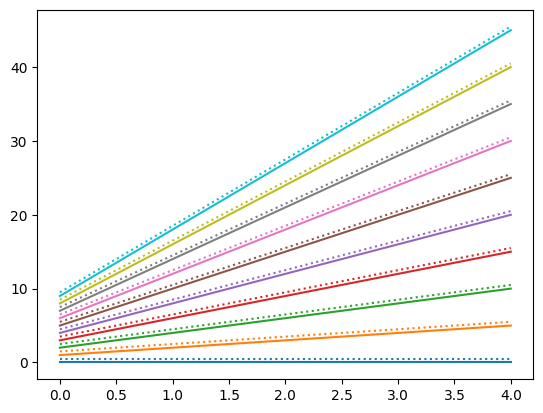

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(5)

for i in range(10):
    ax.plot(t,i*(t+1))
    ax.plot(t,i*(t+1)+.5,color=f"C{i}", linestyle = ':')

## Múltiples paneles en una figura

`subplot(filas, columnas, nro_de_panel)`

El nro_de_panel empieza en 1, y sigue la numeración en orden de lectura (izq a der de arriba a abajo).

Caso usando formato clásico de Matlab
```python
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3)
plt.plot(x, x**2-x)
plt.subplot(2, 2, 4)
plt.plot(x, x**3)
```
 <span style="color:red"><b> Orientado a objetos: </b></span> 
  
```python
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(1,2,1)
ax.plot(x, np.sin(x))
ax = fig.add_subplot(1,2,2)
ax.plot(x, np.cos(x))
```
<div class="alert alert-block alert-success"> Mas compacto: (elegido) </div>

```python
fig, ax = plt.subplots(1,2,figsize=(9,3))
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));
```


## Ejemplo de integración numérica y funciones especiales con scipy

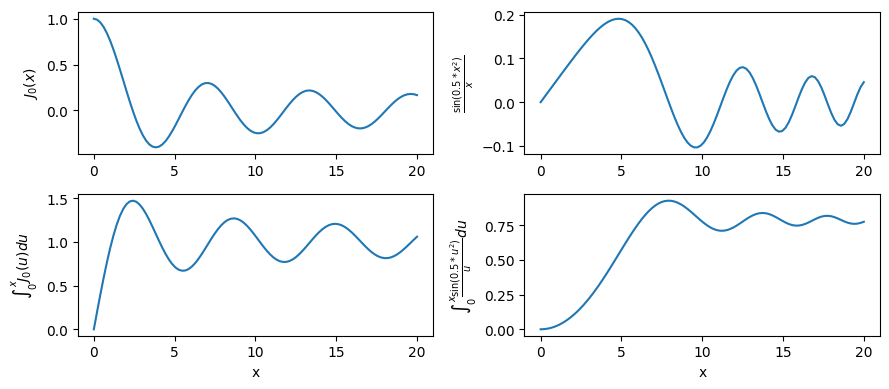

In [11]:
import scipy
def integ_vec(fn,x):
    ''' Integra numericamente y devuelve un vector'''
    x0=x[0]
    ifn=np.zeros(x.shape[0])
    for i in range(1,x.shape[0]):
        ifn[i]=ifn[i-1]+scipy.integrate.quad(fn,x[i-1],x[i],limit=5)[0]
    return ifn        
fn1=scipy.special.j0 # funcion de Bessel 1ra de orden 0
fn2= lambda x : np.sin(0.05*x**2)/x
xlow=np.linspace(0.0001, 20, 30)

# Grafico
fig, ax = plt.subplots(2,2,figsize=(9,4))
ax[0,0].plot(x, fn1(x) ) 
ax[0,0].set(ylabel=r'$J_0(x)$')
ax[0,1].plot(x, fn2(x) )
ax[0,1].set(ylabel=r'$\frac{\sin(0.5*x^2)}{x}$')
ax[1,0].plot(x, integ_vec(fn1,x) )
ax[1,0].set(ylabel=r'$\int^x_0 J_0(u) du$',xlabel='x')
ax[1,1].plot(x, integ_vec(fn2,x) )
ax[1,1].set(ylabel=r'$\int^x_0 \frac{\sin(0.5*u^2)}{u} du$',xlabel='x')
fig.tight_layout()

### Hay varios aspectos que se introducen en el ejemplo.

(a) Tengo un par de funciones que varian su amplitud y frecuencia. 
 - Una es una funcion especial de Bessel 1ra de orden 0 que aparece en optica y en fluidos. La tomo de scipy:  `scipy.special.j0`
 - La otra es una funcion lambda definida por nosotros.
   
(b) Quiero graficar la función integral de ambas. Para esto usamos el `scipy.integrate.quad` que nos integra numericamente en un intervalo. Como quiero obtener la integral como funcion de x tengo que integrar numericamente en intervalito por intervalito, `x[i-1],x[i]`.

(c) En los labels de los plots usamos latex (cadena con un r y los signos pesos \$) que nos permite expresar integrales, subíndices, letras griegas, etc.

(d) El `fig.tight_layout()` me acomoda los paneles para que no se superpongan considerando las captions, titulos, etc.

##  <span style="color:red"><b>Forma orientada a objetos</b></span> 

Instancio los objetos generando la imagen y los ejes: ` fig, ax = plt.subplots(2,2,figsize=(9,4))` 

Luego grafico con metodos del objeto: ` ax[0,0].plot( x, fn1(x) ) `

Una de las cuestiones a tener en cuenta que cambian los comandos para los ajustes del plot

- plt.xlabel -> ax.set_xlabel
- plt.ylabel -> ax.set_ylabel
- plt.xlim   -> ax.set_xlim
- plt.ylim   -> ax.set_ylim
- plt.title  -> ax.set_title

<div class="alert alert-block alert-success"> Podemos usar una forma mas compacta: </div>

```python
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)',title='A Simple Plot')
```

## Graficos de barras

Para los graficos de barras usamos `plt.bar(x,resultado)` o con objetos `ax.bar(x,resultado)`

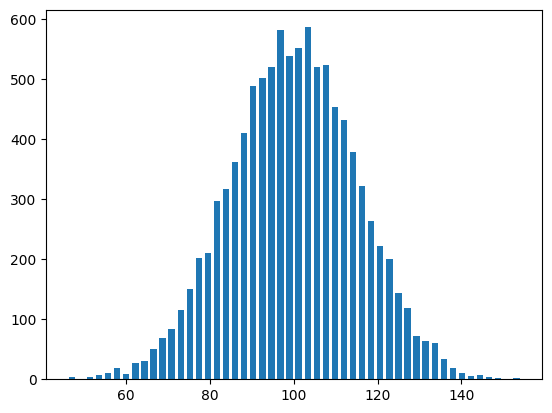

In [12]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
hist, bins = np.histogram(x, bins=50) # cuenta numero de muestras en el rango/bin correspondiente
width = 0.7 * (bins[1] - bins[0]) # para que no rellene todo
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width); 

El conteo que termina apareciendo en las barras la hace una función de numpy `histogram`. 

También el matplotlib tiene una forma de graficar histogramas directamente `plt.hist`

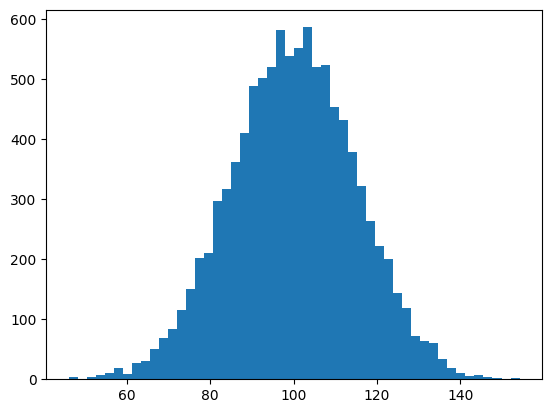

In [14]:
plt.hist(x, bins=50);

Con el argumento `rwidth=0.8` en el `plt.hist` se puede dar el mismo 'look' de la figura anterior.

## Dispersión o spread de una función

Queremos determinar el error en la inferencia cuando queremos hacer una regresión entre dos variables basada en algunos puntos  y la hipótesis de continuidad. 

Para esto usamos procesos Gaussianos.

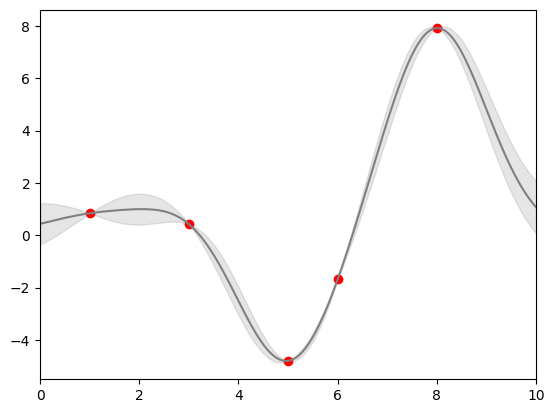

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

Para el estudiante que este motivado y tenga ganas de ver un poquito mas de procesos gaussianos:

[Comparacion de Proceso Gaussiano con kernel ridge](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_compare_gpr_krr.html#sphx-glr-auto-examples-gaussian-process-plot-compare-gpr-krr-py)

## Sistema dinámico de Lorenz-63

Este es un sistema dinámico de 3 ecuaciones con tres variables que evolucionan en el tiempo y que estan acopladas nolinealmente entre si, nominalmente,

\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t}}&=\sigma (y-x),\\[6pt]{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x(\rho -z)-y,\\[6pt]{\frac {\mathrm {d} z}{\mathrm {d} t}}&=xy-\beta z.\end{aligned}

Este sistema es conocido porque es caotico y del cual se derivo el termino de <span style="color:red">efecto mariposa</span>, Edward Lorenz argumento que era el ejemplo de como el aletear de una mariposa podria producir un tornado muy lejos, para ejemplificar en forma exagerada las dependencias de las condiciones iniciales y como pequeñas perturbaciones pueden dar soluciones muy diferentes

**Tenemos tres series de tiempo**


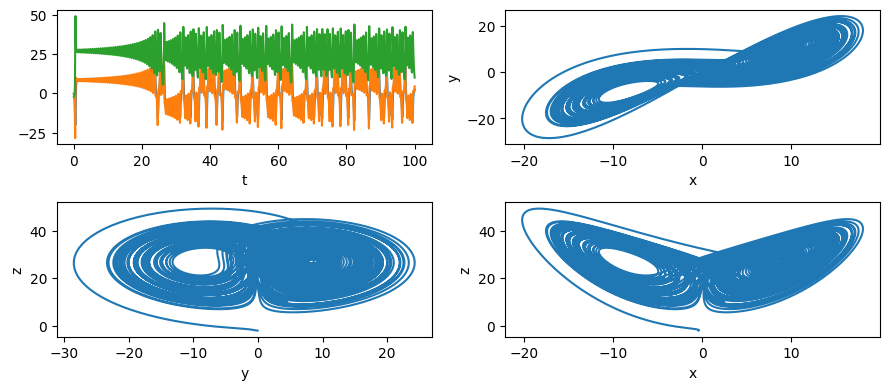

In [16]:
np.random.seed(2)
def lorenz_deriv(x_y_z, t0, sigma=10, beta=8/3, rho=28):
    """Lorenz-63 system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
def lorenz63(x0,max_time=4):
    "Uso scipy para integrar las ecuaciones diferenciales"
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([scipy.integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])# x0 contiene una o varias CIs   
    return t, x_t
# Define un estado inicial aleatorio
x0=np.random.randn(3)
t,x_t=lorenz63(x0[None,:],max_time=100) # integra por un tiempo largo
# Graficacion
fig, ax = plt.subplots(2,2,figsize=(9,4))
ax[0,0].plot(t, x_t[0,:,0],label='x')
ax[0,0].plot(t, x_t[0,:,1],label='y')
ax[0,0].plot(t, x_t[0,:,2],label='z')
ax[0,0].set(xlabel='t')
ax[0,1].plot(x_t[0,:,0], x_t[0,:,1])
ax[0,1].set(xlabel='x',ylabel='y')
ax[1,0].plot(x_t[0,:,1], x_t[0,:,2])
ax[1,0].set(xlabel='y',ylabel='z')
ax[1,1].plot(x_t[0,:,0], x_t[0,:,2])
ax[1,1].set(xlabel='x',ylabel='z')
fig.tight_layout()

## Grafico 3d

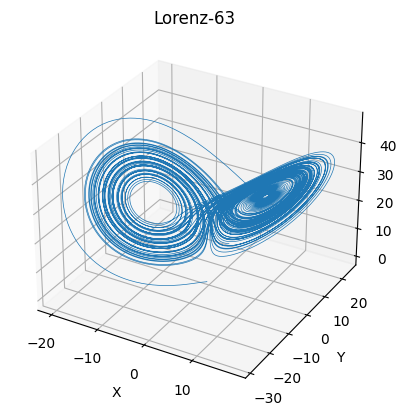

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(x_t[0,:,0],x_t[0,:,1] , x_t[0,:,2], lw=0.5)
ax.set(xlabel="X",ylabel="Y",title="Lorenz-63");

## Graficación de un ensamble. Error de predicción

Usemos nuevamente el `plt.fill_between` para graficar la desviación estandard alrededor de la trayectoria del Lorenz'63. 

Para calcular el **error de predicción** usando muchas simulaciones con condiciones iniciales levemente distintas. 

El **error de predicción** crece con el tiempo porque el sistema es caótico.

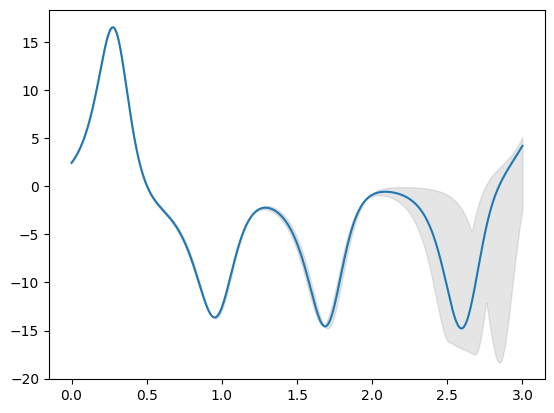

In [18]:
# Tomo el ultimo resultado de la celda anterior y lo perturbo aleatoriamente
x0=x_t[0,-1,:]*(1+0.01 * np.random.randn(30,3)) # 30 condiciones iniciales
# Ahora evoluciono las multiples condiciones iniciales en el tiempo
t,x_ens=lorenz63(x0,max_time=3)  # estoy integrando un ensamble
plt.plot(t, x_ens[:,:,0].mean(0));

plt.fill_between(t, x_ens[:,:,0].min(0) ,x_ens[:,:,0].max(0),color='gray', alpha=0.2);

- Este procedimiento, pronóstico por ensambles, es el que usa el Servicio Meteorológico Nacional y los principales centros de meteorológicos del mundo para hacer los pronósticos y dar la probabilidad de tormentas.
- Notar la potencia de numpy, el código que resuelve la ecuación diferencial `lorenz63` resuelve múltiples ecuaciones a la vez.

### <span style="color:blue"><b>Ejercicio</b></span> 

Ejecutar la celda anterior varias veces. Que es lo que sucede?
- Como lo soluciono?

## Una animación del ensamble

Veamos porque le llaman sistema caótico, vamos a largar con un conjunto de "partículas" que estan muy cerca entre sí. Veamos que resulta a medida que pasa el tiempo. 

In [22]:
%matplotlib qt 

In [23]:
np.random.seed(6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from IPython.display import HTML

N_tra=10
x0=x_t[0,-1,:]*(1+0.04 * np.random.randn(N_tra,3)) 
t,x_ens=lorenz63(x0,max_time=200) 

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_tra))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# Funcion de animacion a ser llamada opr el animator
def animate(i):
    # cantidad de pasos de tiempo por frame
    i = (2 * i) % x_ens.shape[1]

    for line, pt, xi in zip(lines, pts, x_ens):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i) # cambia el angulo en cada frame
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)


#HTML(anim.to_jshtml())

In [25]:
%matplotlib inline

## Scatterplot

Supongamos que tengo un conjunto grandes de puntos que nos relacionan dos variables. 

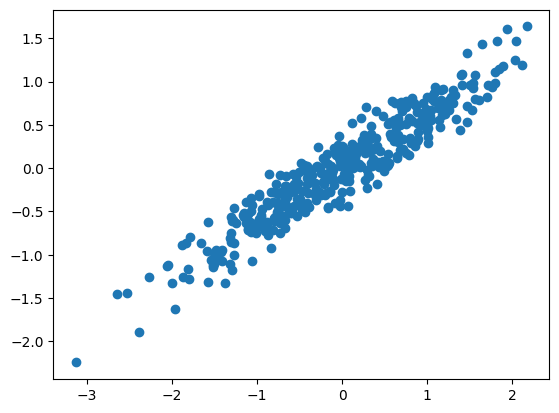

In [26]:

N=400
x=np.random.randn(N)
y=0.6*x+0.2*np.random.randn(N)

fig,ax = plt.subplots()
ax.scatter(x,y);


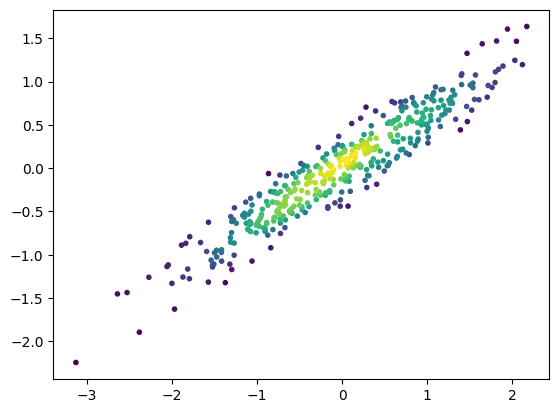

In [27]:
from scipy.stats import gaussian_kde
xy = np.vstack([x,y]) 
z = gaussian_kde(xy)(xy) # quiero poner con  color  en los puntos
# ordeno para que grafique a lo ultimo los puntos de mas frecuencia
idx = z.argsort() # los ultimos los de mayor z
x, y, z = x[idx], y[idx], z[idx]
# Scatterplot grafica los puntos y agregar color por la frec 
fig,ax = plt.subplots()#1,2,figsize=(7,4))
ax.scatter(x,y,c=z,marker='.' );


La estimacion de densidad de probabilidad por nucleos (kernel density estimation/KDE) es un metodo que permite a partir de una muestra obtener una densidad de probabilidad suave. Es una alternativa al histograma que utiliza bins (y es discontinua). 

Por cada muestra propone una funcion nucleo esto la hace suave pero a la vez es muy demandante computacionalmente (cara).

## Graficación de imágenes
  Si lo que queremos graficar es una "imagen" o gráfico de funcion escalar en 2d se utilizan los comandos: `plt.imshow(data), plt.pcolormesh(), plt.contour(), plt.contourf()`. 
  
  Comencemos por el primero `plt.imshow`:
  
-  Puedo poner donde se encuentra el origen de los datos: `plt.imshow(data, origin="lower")`
-  En general esto va a genera un mapa de calor. Si quiero cambiar a escalas de grises 
  `plt.gray()`
-  Si quiero cambiar los limites de/recortar/ la imagen
  `plt.imshow(data,extend=[0,10,0,5])`
-  Si queremos cambiar el aspect ratio (la razón de longitud entre x e y) `plt.imshow(data,aspect=2)`


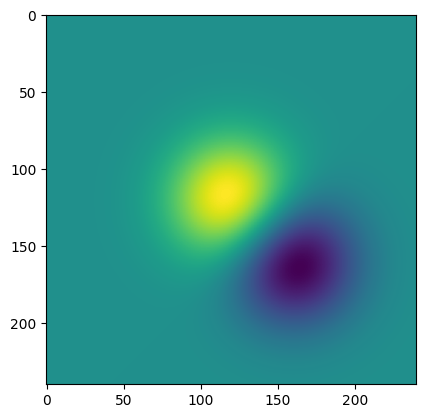

In [28]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y) # genero una grilla de puntos
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z)

Personalizando la imagen:

- Puedo cambiar el origen (por default lo toma arriba a la izquierda).
- Mapa de colores. 
- Puedo poner los ejes con extend pero ojo es el rango que defino.


In [29]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

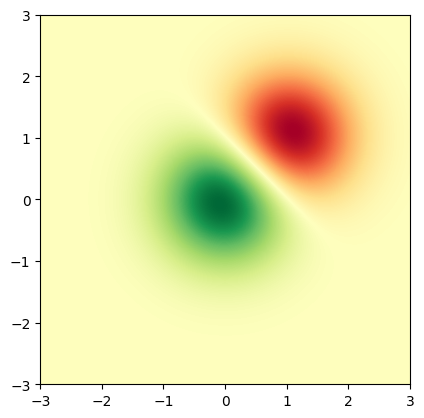

In [30]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
im = ax.imshow(Z,
       interpolation='bilinear',
       cmap=cm.RdYlGn,origin='lower',
       extent=[-3,3,-3,3],
       vmax=abs(Z).max(),
       vmin=-abs(Z).max())


## Contornos
Los datos bidimensionales tambien los podemos graficar con contornos.
Esto puede remarcar mejor la geometria si son superficies suaves.

Text(0.5, 1.0, 'Contorno con etiquetas')

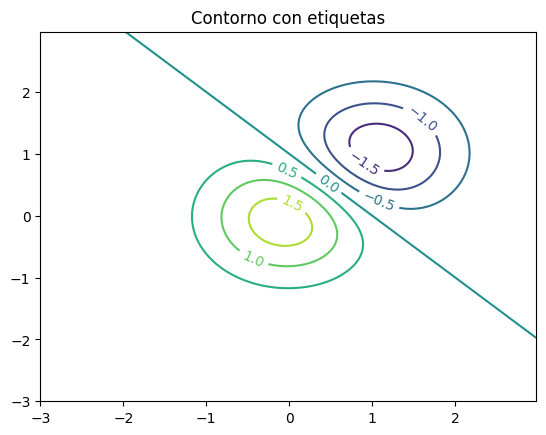

In [31]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Contorno con etiquetas')

Puedo graficar tambien como una imagen pero con los ejes prescriptos a traves de `pcolormesh()`. En el caso de la `imshow()` asume pixels todos equivalentes.

Si queremos contornos pero llenos con distintos colores, `contourf()`.

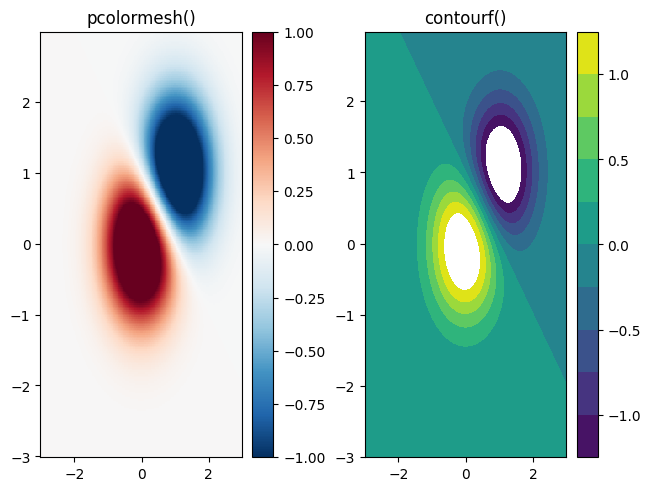

In [32]:
fig, axs = plt.subplots(1, 2,layout='constrained')
pc = axs[0].pcolormesh(X, Y, Z,
    vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0])
axs[0].set_title('pcolormesh()')
co = axs[1].contourf(X, Y, Z,
     levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[1])
axs[1].set_title('contourf()');

### <span style="color:blue"><b>Ejercicio</b></span> 

Agregar como argumento de `contourf extend='both'`. Que efecto tiene?

## Campos de vectores

Con `quiver` graficamos vectores en un plano. Podemos agregar colores de acuerdo a algun criterio (funcion escalar)

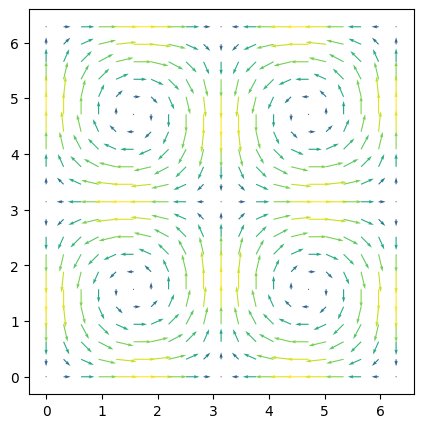

In [33]:
# Genero la grilla
x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
X,Y = np.meshgrid(x,y)

# Campo de velocidades con 4 vortices
u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)
color = np.sqrt(u**2 + v**2) # magnitud

fig, ax = plt.subplots(figsize=(5,5))
ax.quiver(X,Y,u,v,color, scale=17)
ax.set_aspect('equal')


## Contornos con datos de reflectividad de radar

Vamos a cargar datos de reflectividad de radar a distintos tiempos (ntimes,nx,ny)=(15,101,101) 

In [34]:
dat=np.load('storm10.npz')

for key in dat:
    u=dat[key]
u.shape

(15, 101, 101)

<Figure size 640x480 with 0 Axes>

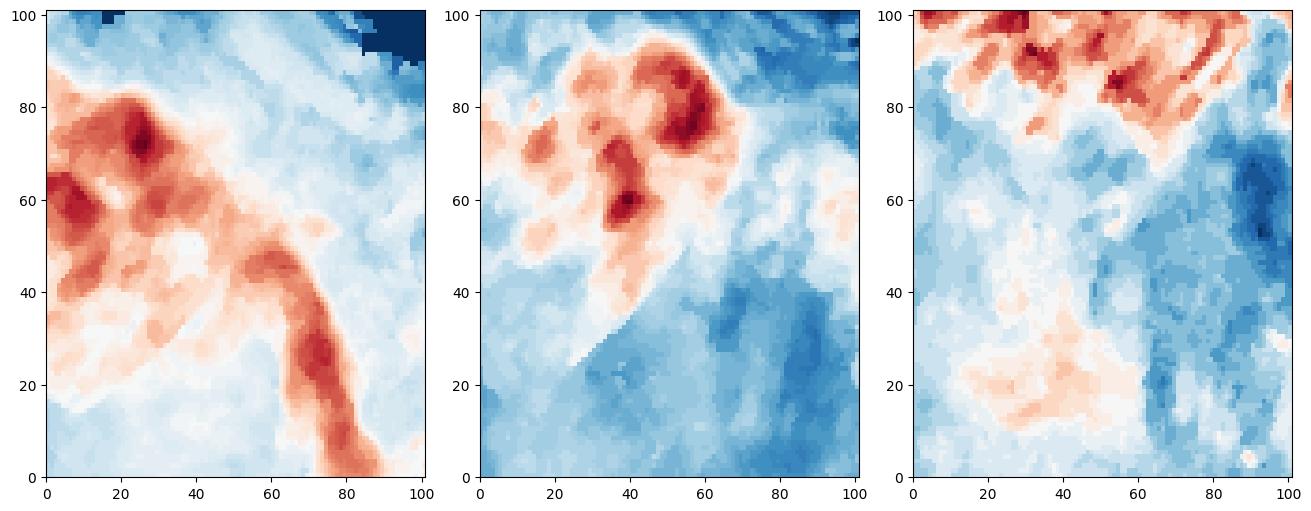

In [35]:
plt.set_cmap('RdBu_r') # defino el colormap para todos los graficos
fig, ax = plt.subplots(1, 3,layout='constrained',figsize=(13,5))
ax[0].pcolormesh(u[0,:,:])
ax[1].pcolormesh(u[5,:,:])
ax[2].pcolormesh(u[14,:,:]);

In [36]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def anim_update(i,img=u):
    """
    img shape: (n_times,nx_pixels,ny_pixels)
    """
    ax.imshow(img[i], origin='lower')
    ax.set_title(f"Frame {i}", fontsize=20)
    ax.set_axis_off()
    plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
anim = FuncAnimation(fig, anim_update, frames=15, interval=150)
# anim.save('colour_rotation.gif', dpi=80, writer='imagemagick') # Guarda la animacion
HTML(anim.to_jshtml())

## Histograma de datos de radar y precipitacion en Cordoba

Los radares miden reflectividad sin embargo lo que nos interesa es conocer es la precipitacion (mm/h)

/tmp/ipykernel_30460/3488790937.py:21: RuntimeWarning: divide by zero encountered in log
  ax[2].pcolormesh(xedges,yedges,np.log(H) )


<Figure size 640x480 with 0 Axes>

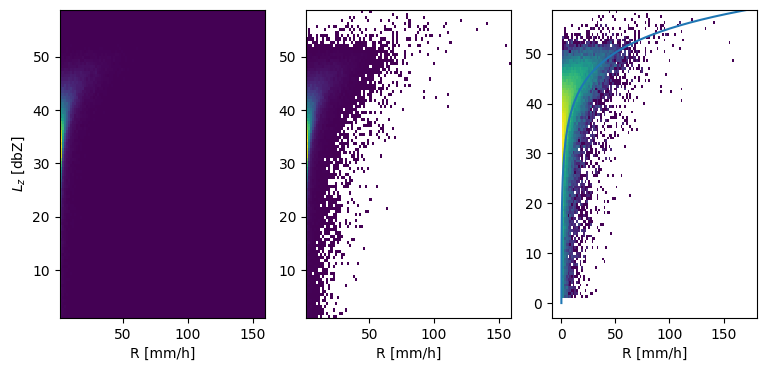

In [40]:
''' Cargo base de datos de radar de reflectividad en Cordoba y la precipitacion resultante '''
plt.set_cmap('viridis') # vuelvo al default
dat=np.load('radar_data.npz')
R=dat['R'] # Precipitacion en mm/h
dbZ=dat['dbZ'] # Reflectividad del radar en dbZ

H, yedges, xedges = np.histogram2d(dbZ,R,bins=100)
# Notar que el histograma me da vuelta las dependencias
# usar .T o invertir los datos de entrada np.(y,x)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

# Grafico
fig,ax = plt.subplots(1,3,figsize=(9,4))
ax[0].pcolormesh(xedges,yedges,H )
ax[1].pcolormesh(xedges,yedges,Hmasked )
ax[2].pcolormesh(xedges,yedges,np.log(H) )
#ax[2].plot(Raxis,dbZaxis,label='Marshall law');
ax[0].set(xlabel='R [mm/h]',ylabel=r'$L_z$ [dbZ]')
ax[1].set(xlabel='R [mm/h]')
ax[2].set(xlabel='R [mm/h]');


## Scatterplot con densidad de probabilidad continua (KDE) 

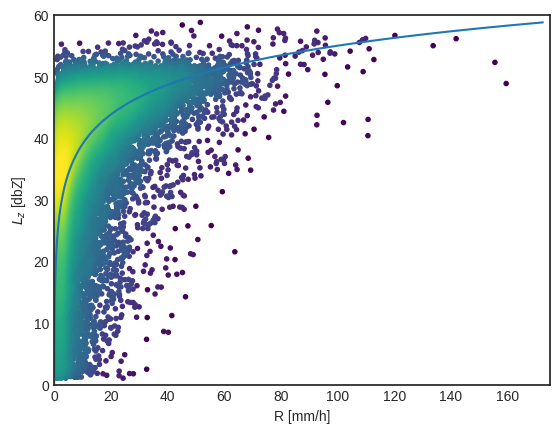

In [65]:
# KDE densidad de probabilidad
#     OJO esto puede llevar tiempo en una PC peque~na
xy = np.vstack([R,dbZ]) 
z = gaussian_kde(xy)(xy) # quiero poner con  color  en los puntos
# la frecuencia/densidad de probabilidad en c/punto

# ordeno para que grafique a lo ultimo los puntos de mas frecuencia
idx = z.argsort() # los ultimos los de mayor z
x, y, z = R[idx], dbZ[idx], z[idx]

# Scatterplot grafica los puntos y agregar color por la frec 
fig,ax = plt.subplots()#1,2,figsize=(7,4))
ax.scatter(x,y,c=np.log(z),marker='.' )
ax.set(xlabel='R [mm/h]',ylabel=r'$L_z$ [dbZ]',xlim=(0,175),ylim=(0,60))

# Uso una ley clasica, Marshall y Palmer, para relacionar las variables
def dbZ2R(dbZ,a=200,b=5./8.): #b=1.6): # default parameters
    return (10**(0.1*dbZ)/a)**b
dbZaxis=np.linspace(0,dbZ.max(),500)
Raxis=dbZ2R(dbZaxis)
ax.plot(Raxis,dbZaxis,label='Marshall law');


## Regresion de los datos

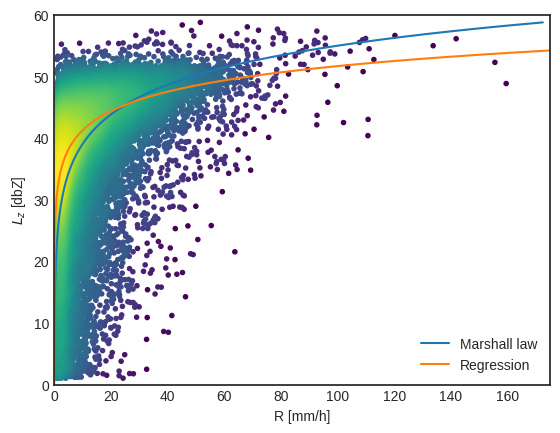

In [69]:
logZ, logR = 0.1* np.log(10)*dbZ, np.log(R)
regr=np.polyfit(logR, logZ, 1)
Rregr=dbZ2R(dbZaxis,a=np.exp(regr[1]),b=regr[0])

# Grafico
fig,ax = plt.subplots()#1,2,figsize=(7,4))
ax.scatter(x,y,c=np.log(z),marker='.' )
ax.set(xlabel='R [mm/h]',ylabel=r'$L_z$ [dbZ]',xlim=(0,175),ylim=(0,60))
ax.plot(Raxis,dbZaxis,label='Marshall law');
ax.plot(Rregr,dbZaxis,label='Regression');
ax.legend();